In [1]:
import numpy as np
import pandas as pd
from pickle import dump


from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
loan_data = pd.read_csv(r"C:/Users/ammanana/Desktop/technocolabs/prosper_loan_data.csv")

In [3]:
loan_data.head()

,CreditGrade,LoanStatus,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange,ListingNumber,Term,ListingCategory (numeric),...,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount,year
0,C,Completed,not available,CO,Other,Self-employed,"$25,000-49,999",193129,36,0,...,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,2007-01-01
1,not available,Current,A,CO,Professional,Employed,"$50,000-74,999",1209647,36,2,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,2014-01-01
2,HR,Completed,not available,GA,Other,Not available,Not displayed,81716,36,0,...,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,2007-01-01
3,not available,Current,A,GA,Skilled Labor,Employed,"$25,000-49,999",658116,36,16,...,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,2012-01-01
4,not available,Current,D,MN,Executive,Employed,"$100,000+",909464,36,2,...,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,2013-01-01


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 70 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   CreditGrade                          113937 non-null  object 
 1   LoanStatus                           113937 non-null  object 
 2   ProsperRating (Alpha)                113937 non-null  object 
 3   BorrowerState                        113937 non-null  object 
 4   Occupation                           113937 non-null  object 
 5   EmploymentStatus                     113937 non-null  object 
 6   IncomeRange                          113937 non-null  object 
 7   ListingNumber                        113937 non-null  int64  
 8   Term                                 113937 non-null  int64  
 9   ListingCategory (numeric)            113937 non-null  int64  
 10  OpenRevolvingAccounts                113937 non-null  int64  
 11  LoanCurrentDa

In [5]:
loan_data.drop(labels=['year','ListingNumber',"LoanNumber","LoanStatus"],inplace=True,axis=1)

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 66 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   CreditGrade                          113937 non-null  object 
 1   ProsperRating (Alpha)                113937 non-null  object 
 2   BorrowerState                        113937 non-null  object 
 3   Occupation                           113937 non-null  object 
 4   EmploymentStatus                     113937 non-null  object 
 5   IncomeRange                          113937 non-null  object 
 6   Term                                 113937 non-null  int64  
 7   ListingCategory (numeric)            113937 non-null  int64  
 8   OpenRevolvingAccounts                113937 non-null  int64  
 9   LoanCurrentDaysDelinquent            113937 non-null  int64  
 10  LoanMonthsSinceOrigination           113937 non-null  int64  
 11  LoanOriginalA

In [7]:
y = loan_data['Status']
x = loan_data.drop('Status',axis=1)

### Data Encoding

In [8]:
categorical_data = x.select_dtypes(include=['object'])
categorical_data.head()

,CreditGrade,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange
0,C,not available,CO,Other,Self-employed,"$25,000-49,999"
1,not available,A,CO,Professional,Employed,"$50,000-74,999"
2,HR,not available,GA,Other,Not available,Not displayed
3,not available,A,GA,Skilled Labor,Employed,"$25,000-49,999"
4,not available,D,MN,Executive,Employed,"$100,000+"


In [9]:
le = LabelEncoder()
categorical_data = categorical_data.apply(LabelEncoder().fit_transform)

In [10]:
categorical_data.head()

,CreditGrade,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange
0,3,7,5,35,7,3
1,8,0,5,41,0,4
2,6,7,10,35,2,6
3,8,0,10,50,0,3
4,8,4,23,19,0,2


In [11]:
numerical_data = x.select_dtypes(include=['int','float'])
numerical_data.head()

,Term,ListingCategory (numeric),OpenRevolvingAccounts,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,Recommendations,InvestmentFromFriendsCount,Investors,BorrowerAPR,...,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount
0,36,0,1,0,78,9425,0,0,258,0.16516,...,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0.0
1,36,2,13,0,0,10000,0,0,1,0.12016,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0
2,36,0,0,0,86,3001,0,0,41,0.28269,...,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0.0
3,36,16,7,0,16,10000,0,0,158,0.12528,...,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0.0
4,36,2,6,0,6,15000,0,0,20,0.24614,...,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

numerical_data_rescaled = pd.DataFrame(scaler.fit_transform(numerical_data), 
                                    columns = numerical_data.columns, 
                                    index = numerical_data.index)

numerical_data_rescaled.head()

,Term,ListingCategory (numeric),OpenRevolvingAccounts,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,Recommendations,InvestmentFromFriendsCount,Investors,BorrowerAPR,...,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount
0,-0.462837,-0.694111,-1.289107,-0.327709,1.538101,0.174196,-0.144505,-0.100943,1.719559,-0.667883,...,1.505580,1.552881,0.755104,-1.293023,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
1,-0.462837,-0.193708,1.302154,-0.327709,-1.064150,0.266258,-0.144505,-0.100943,-0.769821,-1.227898,...,-0.873133,-0.763123,-0.910541,0.901945,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
2,-0.462837,-0.694111,-1.505046,-0.327709,1.804998,-0.854340,-0.144505,-0.100943,-0.382369,0.794753,...,0.000741,-0.025688,0.091335,0.503099,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
3,-0.462837,3.309112,0.006523,-0.327709,-0.530355,0.266258,-0.144505,-0.100943,0.750928,-1.164181,...,0.200406,0.242180,-0.021491,-0.878191,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
4,-0.462837,-0.193708,-0.209415,-0.327709,-0.863977,1.066799,-0.144505,-0.100943,-0.585781,0.339896,...,-0.284546,-0.378993,0.151332,-0.091378,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191


In [13]:
scaled_data = pd.concat([categorical_data,numerical_data_rescaled],axis=1)
scaled_data.head()

,CreditGrade,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange,Term,ListingCategory (numeric),OpenRevolvingAccounts,LoanCurrentDaysDelinquent,...,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount
0,3,7,5,35,7,3,-0.462837,-0.694111,-1.289107,-0.327709,...,1.505580,1.552881,0.755104,-1.293023,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
1,8,0,5,41,0,4,-0.462837,-0.193708,1.302154,-0.327709,...,-0.873133,-0.763123,-0.910541,0.901945,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
2,6,7,10,35,2,6,-0.462837,-0.694111,-1.505046,-0.327709,...,0.000741,-0.025688,0.091335,0.503099,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
3,8,0,10,50,0,3,-0.462837,3.309112,0.006523,-0.327709,...,0.200406,0.242180,-0.021491,-0.878191,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
4,8,4,23,19,0,2,-0.462837,-0.193708,-0.209415,-0.327709,...,-0.284546,-0.378993,0.151332,-0.091378,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191


## PCA

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(scaled_data)

component_names = [f"PC{i+1}" for i in range(x_pca.shape[1])]
x_pca = pd.DataFrame(x_pca, columns=component_names)

x_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65
0,3.528903,-17.036206,5.298294,3.635968,-1.230932,0.996783,5.214567,-0.843537,-0.460357,1.076417,...,-0.055376,-0.082785,-0.033598,0.068610,-0.051339,-0.008878,-0.005649,0.084433,-2.014554e-05,2.111163e-14
1,9.411816,-16.599003,-5.829949,0.914132,-1.304610,-2.431279,-1.450009,0.186897,0.587237,0.593474,...,0.383161,-0.039845,-0.132803,-0.086578,-0.137730,0.001833,-0.063213,0.006550,6.390549e-07,1.051886e-14
2,3.563569,-11.991336,4.776511,-1.745478,-3.149651,1.005021,0.312746,0.302865,-0.767170,-0.364375,...,0.182469,0.345966,-0.079377,-0.006446,-0.021523,0.000540,0.062031,0.216083,-4.320539e-06,-4.297314e-15
3,18.418895,-11.621385,-5.728371,1.758234,-2.455491,1.159899,-0.074125,-0.087591,0.487672,1.720568,...,-0.108959,0.121094,-0.029263,0.024283,-0.263346,-0.005350,-0.062296,0.001945,1.655352e-05,1.380969e-14
4,-12.533464,1.357287,-1.374550,-0.810965,2.731929,-0.676498,-1.356908,-1.564524,0.032797,-0.033788,...,-0.174529,-0.068884,-0.337607,0.117341,-0.063933,0.005667,-0.025184,-0.008290,-8.045723e-05,1.411614e-14


In [15]:
loadings = pd.DataFrame(pca.components_.T,columns=component_names,index=scaled_data.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65
CreditGrade,-0.000720,0.022601,-0.455015,-0.523032,0.035826,0.117457,0.110091,-0.029460,0.128303,0.095500,...,0.018649,0.082769,-0.001591,-0.009347,-0.069707,0.000878,-0.022808,-0.004017,-1.543046e-06,-0.000000e+00
ProsperRating (Alpha),0.004913,-0.020535,0.603529,-0.047945,0.156171,-0.036605,-0.053816,0.020569,-0.153112,-0.074529,...,0.075864,-0.196033,0.009889,0.012537,0.183058,0.000954,0.055506,-0.004481,7.930923e-07,6.758977e-17
BorrowerState,0.001784,0.999075,0.038495,0.012628,-0.008005,0.002246,-0.002811,0.004406,0.003296,0.002659,...,-0.000008,0.000378,0.000047,0.000060,0.000025,-0.000002,-0.000052,0.000030,6.073168e-08,-1.166643e-17
Occupation,0.999862,-0.001464,-0.010362,0.008198,0.006699,0.001253,-0.004980,0.001115,-0.001998,0.001406,...,-0.000210,0.000166,0.000033,-0.000007,0.000027,-0.000003,-0.000020,-0.000008,-6.496928e-08,5.591043e-19
EmploymentStatus,0.006114,-0.004550,0.134487,0.079540,-0.014791,-0.249160,0.872983,-0.161986,0.149326,0.156322,...,-0.008881,-0.002136,-0.000016,0.000270,-0.000173,-0.000238,-0.000012,-0.000351,-8.486018e-07,1.024792e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP_GrossPrincipalLoss,0.000981,-0.003295,0.070257,0.049858,0.071857,0.018873,-0.020860,0.014872,0.477239,-0.208814,...,-0.021552,-0.028783,0.000717,-0.022945,-0.004151,0.710660,-0.009326,0.001350,2.724868e-05,-4.689333e-19
LP_NetPrincipalLoss,0.000977,-0.003306,0.068926,0.048483,0.070612,0.017119,-0.020737,0.014843,0.467842,-0.204219,...,0.002644,-0.021757,-0.000520,-0.006075,-0.007240,-0.701649,0.008750,-0.001529,-2.641904e-05,-1.279685e-17
LP_NonPrincipalRecoverypayments,0.000253,-0.001047,0.031799,0.021196,0.033562,0.013251,-0.016872,0.010208,0.252308,-0.100533,...,0.023176,0.007481,-0.001360,-0.007170,-0.000300,-0.014174,0.001375,-0.000219,-3.634356e-06,-2.129706e-16
PercentFunded,0.000022,-0.000104,0.007534,0.006896,-0.019492,-0.051077,-0.015493,0.010888,-0.010664,-0.006118,...,-0.006503,0.015740,-0.000808,0.002022,0.002942,-0.000322,-0.000276,-0.000110,1.886031e-07,-4.409522e-17


In [16]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46723469, 0.86822434, 0.89385867, 0.90686935, 0.9157861 ,
       0.92233733, 0.92780913, 0.93298353, 0.93771005, 0.94153839,
       0.94515082, 0.94826196, 0.95111923, 0.95382798, 0.95640999,
       0.95884508, 0.96109336, 0.96323709, 0.96525456, 0.96715802,
       0.96898824, 0.97074543, 0.97248303, 0.97414165, 0.97574477,
       0.97731091, 0.97884432, 0.98033041, 0.98171814, 0.98309744,
       0.98436418, 0.98561182, 0.98677918, 0.98792486, 0.98896298,
       0.98989564, 0.99080206, 0.99163717, 0.99244026, 0.99320603,
       0.9939362 , 0.99466403, 0.99529161, 0.99591504, 0.99638383,
       0.99684244, 0.99729169, 0.99772842, 0.99814746, 0.99848928,
       0.99880475, 0.99907908, 0.9993266 , 0.9994883 , 0.99963556,
       0.99977138, 0.99986911, 0.99991646, 0.99996059, 0.99998355,
       0.99999173, 0.99999884, 1.        , 1.        , 1.        ])

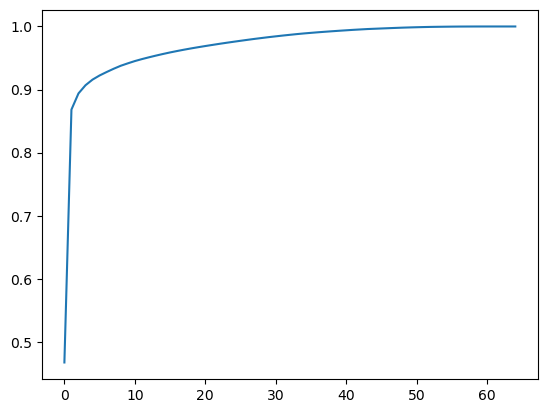

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

## MUTAL INFORMATION GAIN

In [18]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(scaled_data,y)
mutual_info

array([0.07352123, 0.07108357, 0.00687481, 0.0105951 , 0.04311433,
       0.02351851, 0.01965714, 0.04109714, 0.01537593, 0.39699841,
       0.0890924 , 0.02135508, 0.00536604, 0.00173729, 0.03269744,
       0.09519159, 0.08150938, 0.08028304, 0.08996539, 0.08949355,
       0.09073933, 0.06883982, 0.06085266, 0.01369816, 0.0393825 ,
       0.03744127, 0.01845685, 0.02019149, 0.00515761, 0.01777829,
       0.02939645, 0.02740209, 0.02126861, 0.00936693, 0.00809759,
       0.0079353 , 0.00170319, 0.01896967, 0.02126014, 0.02536224,
       0.01563609, 0.02340256, 0.00994867, 0.00392479, 0.01398903,
       0.00258747, 0.00228602, 0.00434341, 0.00158263, 0.00083365,
       0.00321206, 0.00227547, 0.00388292, 0.33915421, 0.06468873,
       0.05282519, 0.08492978, 0.01957458, 0.02044102, 0.04155529,
       0.34674245, 0.34364475, 0.04468338, 0.00269301, 0.00174033])

In [19]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = scaled_data.columns
mutual_info.sort_values(ascending=False).head(30)

LoanCurrentDaysDelinquent             0.396998
LP_GrossPrincipalLoss                 0.346742
LP_NetPrincipalLoss                   0.343645
LoanFirstDefaultedCycleNumber         0.339154
BorrowerAPR                           0.095192
EstimatedReturn                       0.090739
EstimatedEffectiveYield               0.089965
EstimatedLoss                         0.089494
LoanMonthsSinceOrigination            0.089092
LP_CustomerPrincipalPayments          0.084930
BorrowerRate                          0.081509
LenderYield                           0.080283
CreditGrade                           0.073521
ProsperRating (Alpha)                 0.071084
ProsperRating (numeric)               0.068840
MonthlyLoanPayment                    0.064689
ProsperScore                          0.060853
LP_CustomerPayments                   0.052825
LP_NonPrincipalRecoverypayments       0.044683
EmploymentStatus                      0.043114
LP_CollectionFees                     0.041555
ListingCatego

<AxesSubplot:>

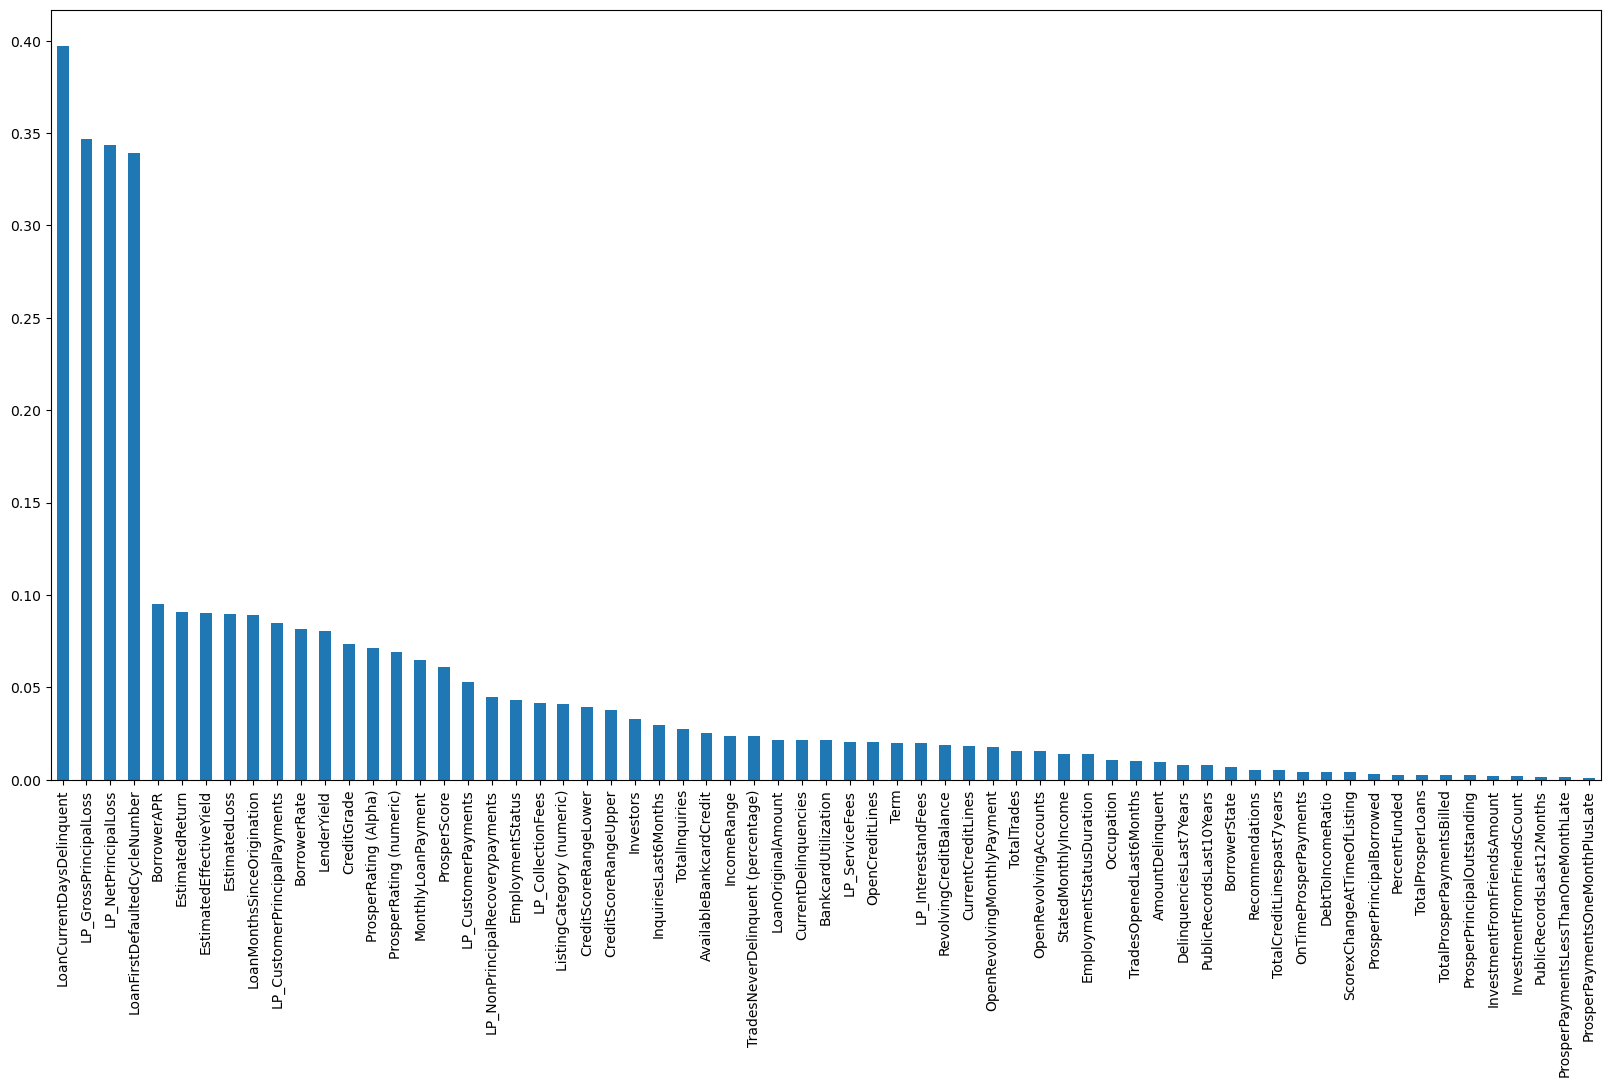

In [20]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,10))

### Correlation matrix

In [21]:
correlation_matrix = pd.concat([x,y],axis=1)
correlation_matrix.head()

,CreditGrade,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange,Term,ListingCategory (numeric),OpenRevolvingAccounts,LoanCurrentDaysDelinquent,...,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount,Status
0,C,not available,CO,Other,Self-employed,"$25,000-49,999",36,0,1,0,...,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0
1,not available,A,CO,Professional,Employed,"$50,000-74,999",36,2,13,0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0
2,HR,not available,GA,Other,Not available,Not displayed,36,0,0,0,...,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0
3,not available,A,GA,Skilled Labor,Employed,"$25,000-49,999",36,16,7,0,...,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0
4,not available,D,MN,Executive,Employed,"$100,000+",36,2,6,0,...,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,0


In [22]:
corr = correlation_matrix.corr()
corr

,Term,ListingCategory (numeric),OpenRevolvingAccounts,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,Recommendations,InvestmentFromFriendsCount,Investors,BorrowerAPR,...,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount,Status
Term,1.000000,0.004947,0.093637,-0.134134,-0.342130,0.338927,-0.056680,-0.043507,-0.045137,-0.011183,...,-0.128255,0.158890,-0.167600,0.035841,-0.038353,-0.035981,-0.034157,-0.028806,-0.024472,-0.127260
ListingCategory (numeric),0.004947,1.000000,-0.073184,-0.101629,-0.198650,-0.127130,-0.028031,-0.018968,-0.073996,0.132449,...,-0.062050,-0.030451,0.034189,0.019839,-0.054002,-0.053068,-0.027700,-0.011688,-0.013096,-0.067652
OpenRevolvingAccounts,0.093637,-0.073184,1.000000,-0.109019,-0.213493,0.233128,-0.011529,-0.008483,0.049841,-0.110175,...,0.019077,0.023936,-0.068737,0.027315,-0.030861,-0.029984,-0.013767,-0.000285,-0.005228,-0.116267
LoanCurrentDaysDelinquent,-0.134134,-0.101629,-0.109019,1.000000,0.419305,-0.097021,0.063427,0.030843,0.081734,0.088031,...,-0.100597,0.008295,0.054951,-0.133772,0.534058,0.533930,0.183147,0.009926,0.023622,0.819239
LoanMonthsSinceOrigination,-0.342130,-0.198650,-0.213493,0.419305,1.000000,-0.309058,0.146977,0.110114,0.258590,-0.073732,...,0.302405,0.158185,-0.088922,-0.105254,0.251267,0.246567,0.107535,0.013106,0.065337,0.383344
LoanOriginalAmount,0.338927,-0.127130,0.233128,-0.097021,-0.309058,1.000000,-0.018190,-0.007509,0.380093,-0.322859,...,0.322965,0.366359,-0.483367,-0.026213,0.127492,0.127408,0.024310,-0.010248,0.020351,-0.116048
Recommendations,-0.056680,-0.028031,-0.011529,0.063427,0.146977,-0.018190,1.000000,0.718079,0.073824,-0.044236,...,0.084628,0.036074,-0.039016,-0.015910,0.041372,0.040897,0.016845,0.009604,0.322062,0.047292
InvestmentFromFriendsCount,-0.043507,-0.018968,-0.008483,0.030843,0.110114,-0.007509,0.718079,1.000000,0.058773,-0.046757,...,0.080778,0.027858,-0.035004,-0.008319,0.020932,0.020350,0.010109,0.001622,0.483506,0.022033
Investors,-0.045137,-0.073996,0.049841,0.081734,0.258590,0.380093,0.073824,0.058773,1.000000,-0.307588,...,0.551215,0.382127,-0.524836,-0.074550,0.219807,0.216049,0.066970,-0.049716,0.012178,0.074680
BorrowerAPR,-0.011183,0.132449,-0.110175,0.088031,-0.073732,-0.322859,-0.044236,-0.046757,-0.307588,1.000000,...,-0.180433,0.169713,0.116966,-0.041452,0.067300,0.067385,0.028519,-0.028236,-0.031841,0.157185


<AxesSubplot:>

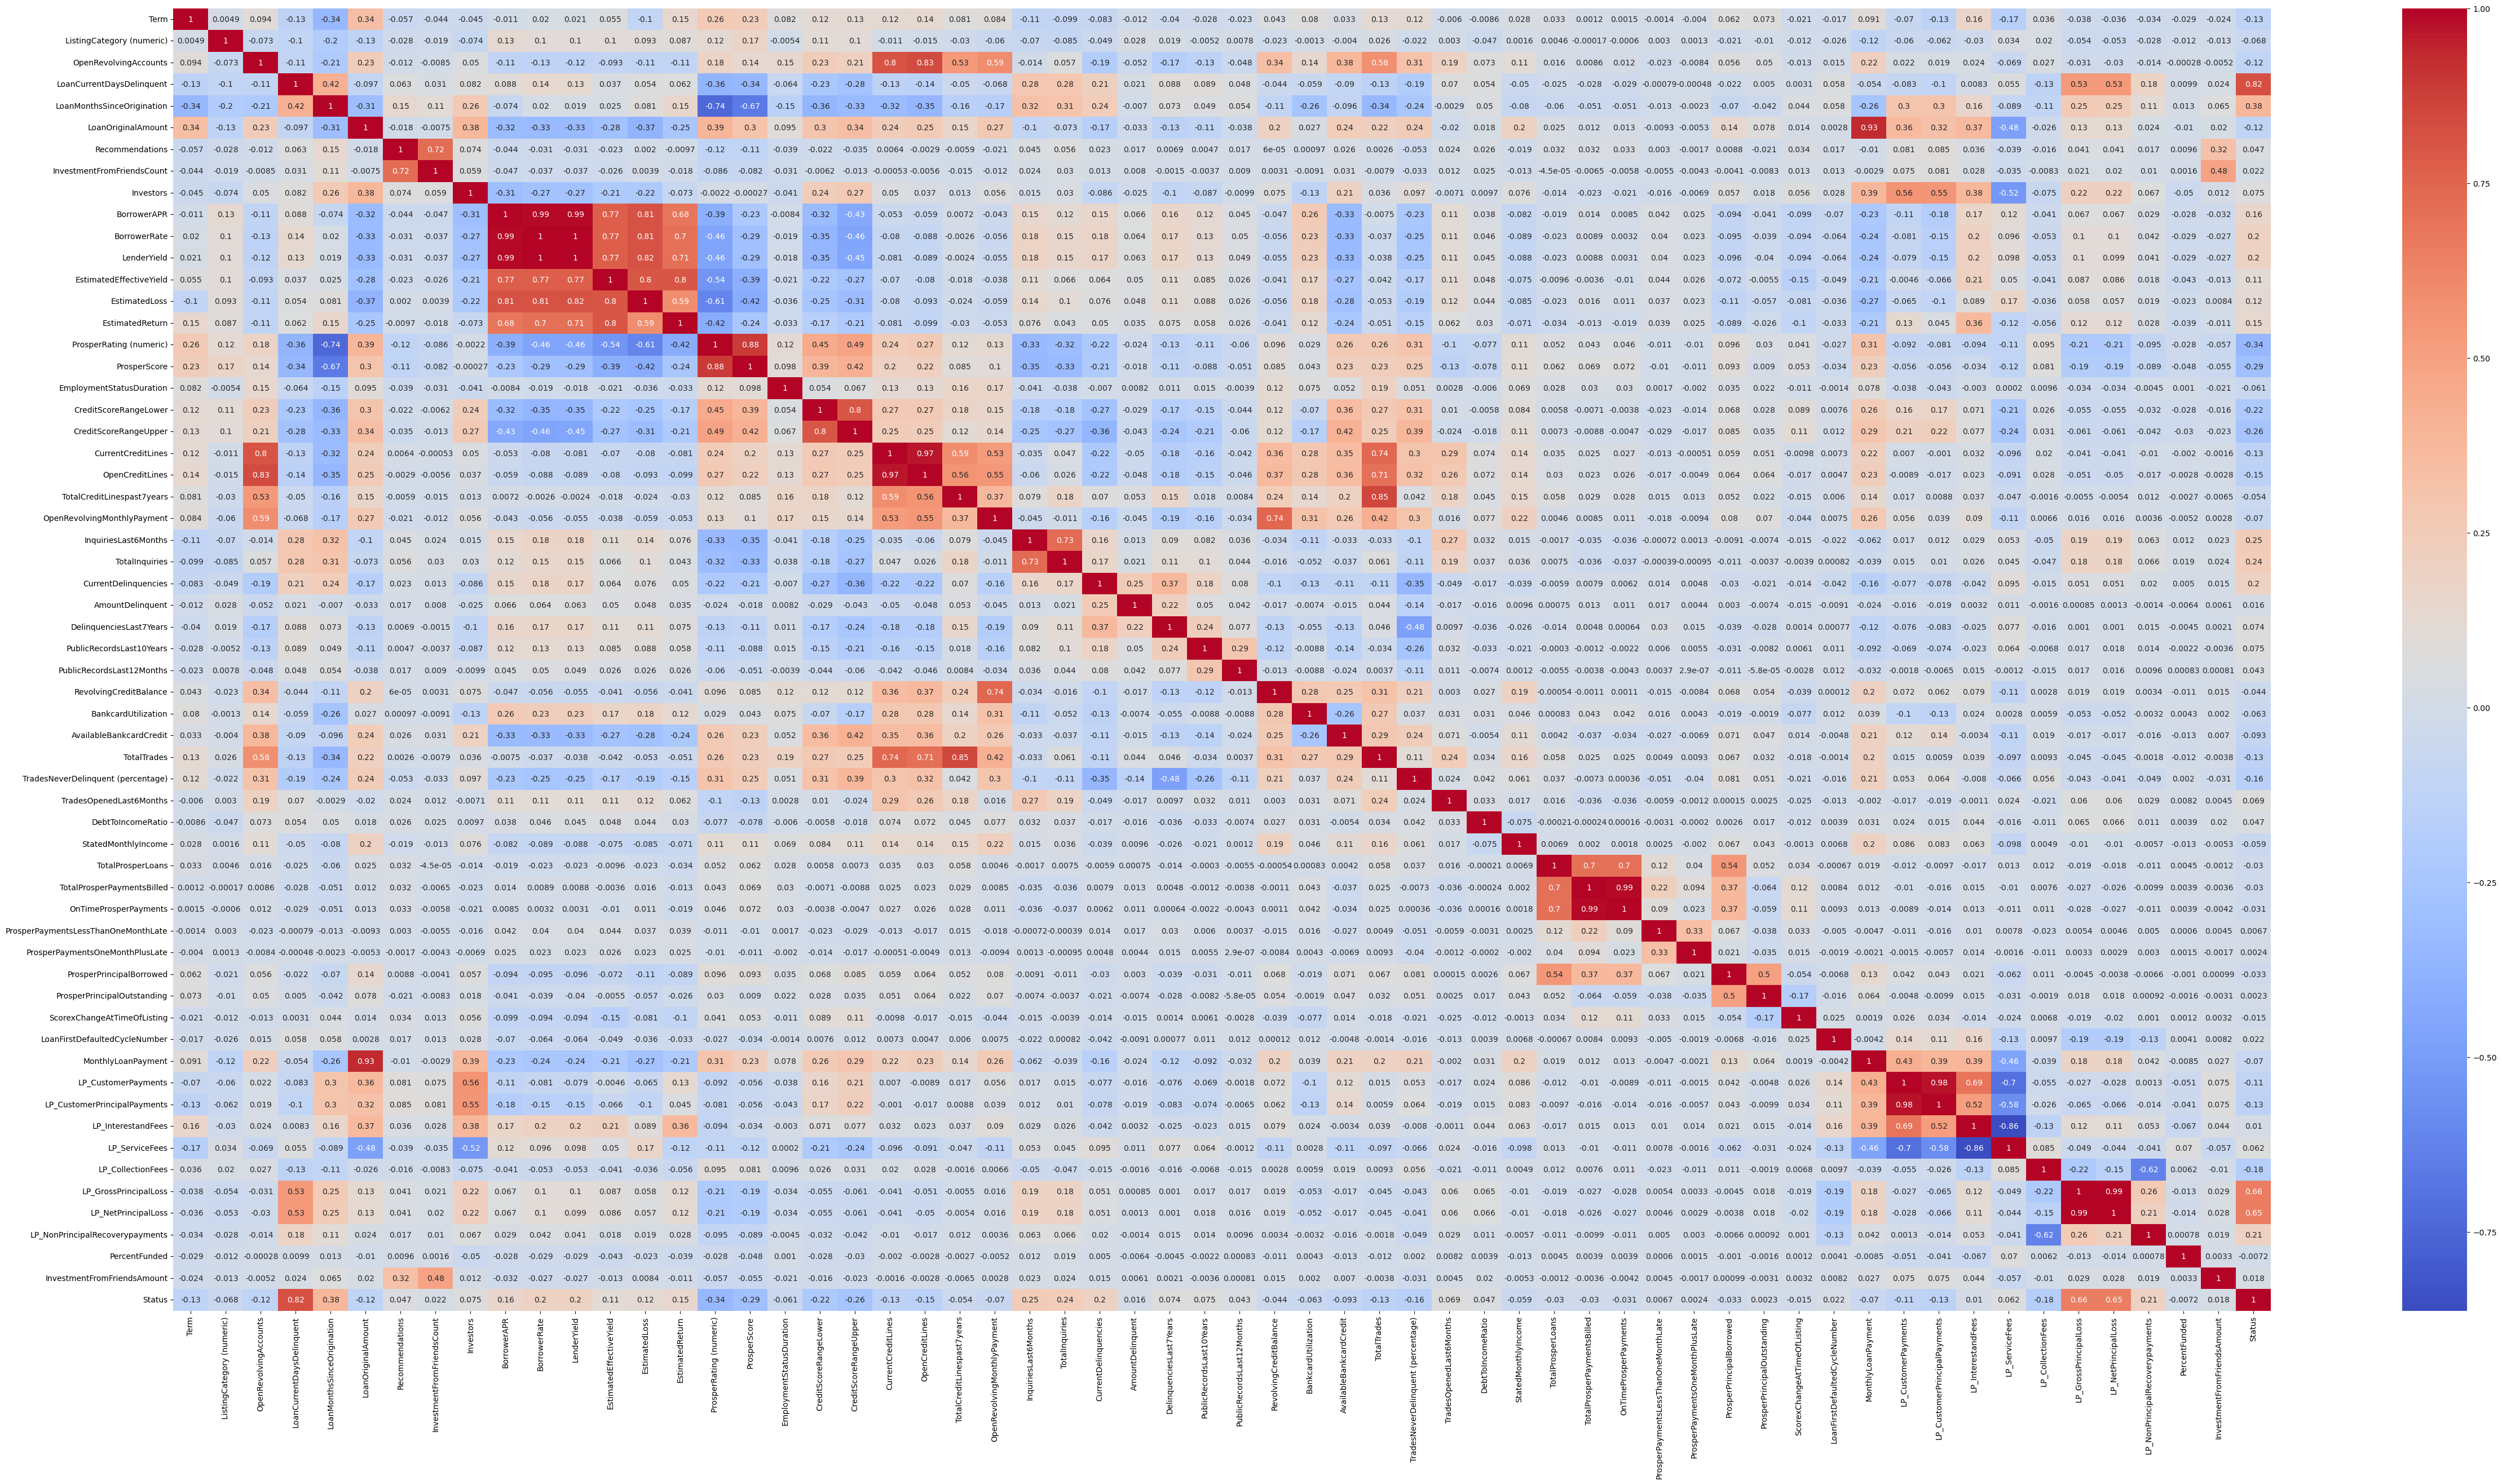

In [23]:
# display correlation matrix in heatmap
corr = correlation_matrix.corr()
plt.figure(figsize=(60,30))
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Creating the model using PCA

In [24]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, train_size=0.7, random_state=100)

In [25]:
pca = PCA(n_components=20)
x_train_pca = pca.fit_transform(X_train)
x_train_pca
x_test_pca = pca.transform(X_test)

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x_train_pca, y_train)


LogisticRegression()

In [27]:
y_train_pred = regressor.predict(x_train_pca)

In [28]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
103781,0,0
56535,0,0
74830,0,0
98341,0,0
84660,0,1


In [29]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.9718763713873738
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     69176
           1       0.91      0.87      0.89     10579

    accuracy                           0.97     79755
   macro avg       0.95      0.93      0.94     79755
weighted avg       0.97      0.97      0.97     79755



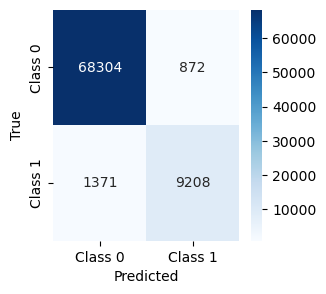

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [31]:
y_test_pred = regressor.predict(x_test_pca)

In [32]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,0
99191,0,0


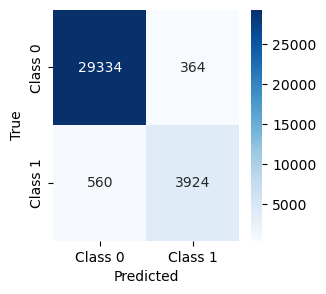

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [34]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9729682288923995
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     29698
           1       0.92      0.88      0.89      4484

    accuracy                           0.97     34182
   macro avg       0.95      0.93      0.94     34182
weighted avg       0.97      0.97      0.97     34182



### Navie Byes

In [35]:
from sklearn.naive_bayes import BernoulliNB
navie_byes = BernoulliNB()
navie_byes.fit(x_train_pca, y_train)

BernoulliNB()

In [36]:
y_train_pred = navie_byes.predict(x_train_pca)

In [37]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
103781,0,0
56535,0,0
74830,0,0
98341,0,0
84660,0,1


In [38]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.9281048210143564
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     69176
           1       0.87      0.54      0.67     10579

    accuracy                           0.93     79755
   macro avg       0.90      0.76      0.81     79755
weighted avg       0.92      0.93      0.92     79755



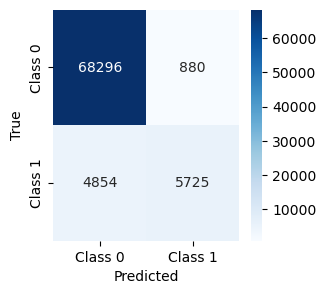

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [40]:
y_test_pred = navie_byes.predict(x_test_pca)

In [41]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,0
99191,0,0


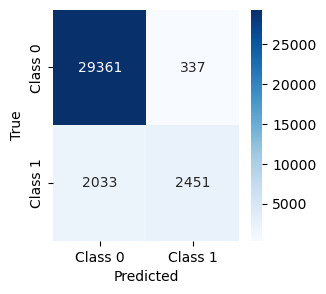

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [43]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.930665262418817
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     29698
           1       0.88      0.55      0.67      4484

    accuracy                           0.93     34182
   macro avg       0.91      0.77      0.82     34182
weighted avg       0.93      0.93      0.92     34182



## Creating Model Using Mutual Information

In [44]:
x = scaled_data[['LoanCurrentDaysDelinquent','LP_GrossPrincipalLoss','LP_NetPrincipalLoss','LoanFirstDefaultedCycleNumber','BorrowerAPR','EstimatedReturn','LoanMonthsSinceOrigination',
     'EstimatedEffectiveYield','EstimatedLoss','LP_CustomerPrincipalPayments','BorrowerRate','LenderYield','CreditGrade','ProsperRating (numeric)','ProsperRating (Alpha)',
     'MonthlyLoanPayment','ProsperScore','LP_CustomerPayments']]

In [45]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   LoanCurrentDaysDelinquent      113937 non-null  float64
 1   LP_GrossPrincipalLoss          113937 non-null  float64
 2   LP_NetPrincipalLoss            113937 non-null  float64
 3   LoanFirstDefaultedCycleNumber  113937 non-null  float64
 4   BorrowerAPR                    113937 non-null  float64
 5   EstimatedReturn                113937 non-null  float64
 6   LoanMonthsSinceOrigination     113937 non-null  float64
 7   EstimatedEffectiveYield        113937 non-null  float64
 8   EstimatedLoss                  113937 non-null  float64
 9   LP_CustomerPrincipalPayments   113937 non-null  float64
 10  BorrowerRate                   113937 non-null  float64
 11  LenderYield                    113937 non-null  float64
 12  CreditGrade                   

## LogisticRegression

In [46]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [47]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)


LogisticRegression()

In [48]:
y_train_pred = regressor.predict(X_train)

In [49]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
103781,0,0
56535,0,0
74830,0,0
98341,0,0
84660,0,0


In [50]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.9993730800576767
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69176
           1       1.00      1.00      1.00     10579

    accuracy                           1.00     79755
   macro avg       1.00      1.00      1.00     79755
weighted avg       1.00      1.00      1.00     79755



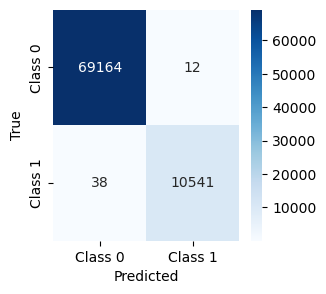

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [52]:
y_test_pred = regressor.predict(X_test)

In [53]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,1
99191,0,0


In [54]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9993856415657364
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29698
           1       1.00      1.00      1.00      4484

    accuracy                           1.00     34182
   macro avg       1.00      1.00      1.00     34182
weighted avg       1.00      1.00      1.00     34182



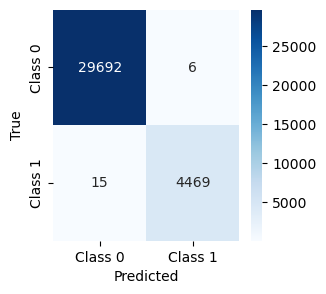

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Navie Bayes

In [56]:
from sklearn.naive_bayes import BernoulliNB
navie_byes = BernoulliNB()
navie_byes.fit(X_train, y_train)

BernoulliNB()

In [57]:
y_train_pred = navie_byes.predict(X_train)

In [58]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
103781,0,0
56535,0,0
74830,0,0
98341,0,0
84660,0,1


In [59]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.9888282866277976
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     69176
           1       0.93      0.99      0.96     10579

    accuracy                           0.99     79755
   macro avg       0.96      0.99      0.98     79755
weighted avg       0.99      0.99      0.99     79755



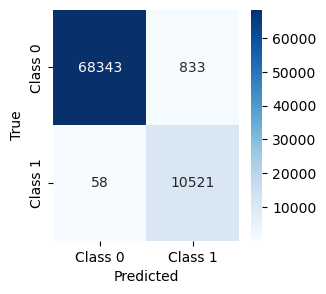

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [61]:
y_test_pred = navie_byes.predict(X_test)

In [62]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,1
99191,0,0


In [63]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9886489965478907
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29698
           1       0.93      0.99      0.96      4484

    accuracy                           0.99     34182
   macro avg       0.96      0.99      0.98     34182
weighted avg       0.99      0.99      0.99     34182



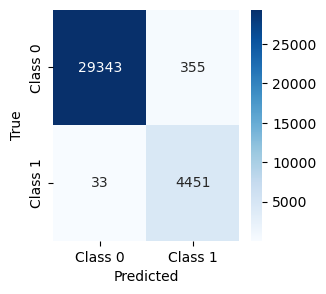

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Resampling and Regualrization on PCA data

In [65]:
y_train.value_counts()

0    69176
1    10579
Name: Status, dtype: int64

In [66]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, train_size=0.7, random_state=100)

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
pca = PCA(n_components=20)
x_train_pca = pca.fit_transform(X_train)
x_train_pca

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled_pca, y_resampled = smote.fit_resample(x_train_pca, y_train)

x_test_pca = pca.transform(X_test)

In [69]:
y_resampled.value_counts()

0    69176
1    69176
Name: Status, dtype: int64

## Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_resampled_pca, y_resampled)


LogisticRegression()

In [71]:
y_train_pred = regressor.predict(X_resampled_pca)

In [72]:
temp_df = pd.DataFrame({'Actual': y_resampled, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [73]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_resampled, y_train_pred))
print(metrics.classification_report(y_resampled, y_train_pred))

0.9822120388574072
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     69176
           1       0.98      0.99      0.98     69176

    accuracy                           0.98    138352
   macro avg       0.98      0.98      0.98    138352
weighted avg       0.98      0.98      0.98    138352



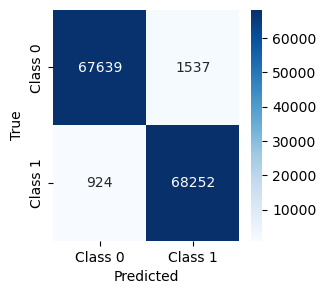

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_resampled, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [75]:
y_test_pred = regressor.predict(x_test_pca)

In [76]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,1
99191,0,0


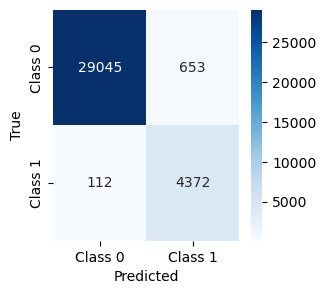

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [78]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9776197998946814
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     29698
           1       0.87      0.98      0.92      4484

    accuracy                           0.98     34182
   macro avg       0.93      0.98      0.95     34182
weighted avg       0.98      0.98      0.98     34182



## Reguarlization on logistic Regression(pca data)

In [79]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_resampled_pca, y_resampled)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.9821397885999985


In [80]:
## creating model using best params

from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression(C = 1,penalty =  'l2')
log_regressor.fit(X_resampled_pca, y_resampled)


LogisticRegression(C=1)

In [81]:
y_train_pred = log_regressor.predict(X_resampled_pca)

In [82]:
temp_df = pd.DataFrame({'Actual': y_resampled, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [83]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_resampled, y_train_pred))
print(metrics.classification_report(y_resampled, y_train_pred))

0.9822120388574072
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     69176
           1       0.98      0.99      0.98     69176

    accuracy                           0.98    138352
   macro avg       0.98      0.98      0.98    138352
weighted avg       0.98      0.98      0.98    138352



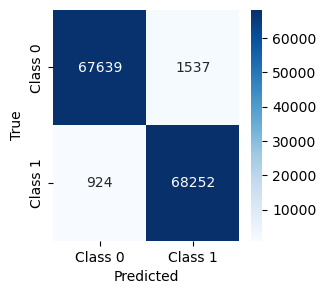

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_resampled, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [85]:
y_test_pred = log_regressor.predict(x_test_pca)

In [86]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,1
99191,0,0


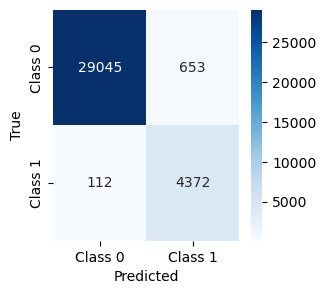

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [88]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9776197998946814
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     29698
           1       0.87      0.98      0.92      4484

    accuracy                           0.98     34182
   macro avg       0.93      0.98      0.95     34182
weighted avg       0.98      0.98      0.98     34182



## Navie Byes on PCA Data

In [89]:
from sklearn.naive_bayes import BernoulliNB
navie_byes = BernoulliNB()
navie_byes.fit(X_resampled_pca, y_resampled)

BernoulliNB()

In [90]:
y_train_pred = navie_byes.predict(X_resampled_pca)

In [91]:
temp_df = pd.DataFrame({'Actual': y_resampled, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [92]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_resampled, y_train_pred))
print(metrics.classification_report(y_resampled, y_train_pred))

0.905899444894183
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     69176
           1       0.94      0.87      0.90     69176

    accuracy                           0.91    138352
   macro avg       0.91      0.91      0.91    138352
weighted avg       0.91      0.91      0.91    138352



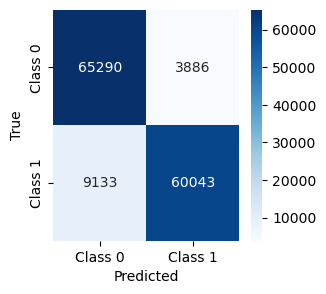

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_resampled, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [94]:
y_test_pred = navie_byes.predict(x_test_pca)

In [95]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,1
99191,0,0


In [96]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9302849452928442
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     29698
           1       0.69      0.84      0.76      4484

    accuracy                           0.93     34182
   macro avg       0.83      0.89      0.86     34182
weighted avg       0.94      0.93      0.93     34182



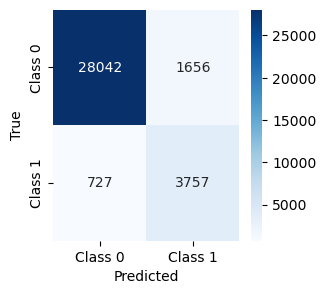

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [98]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB
grid={ 
    'alpha': [0.1, 0.5, 1.0],'binarize': [0.0, 0.5, 1.0],}
navie=BernoulliNB()
navie_byes=GridSearchCV(navie,grid,cv=5)
navie_byes.fit(X_resampled_pca, y_resampled)

print("tuned hpyerparameters :(best parameters) ",navie_byes.best_params_)
print("accuracy :",navie_byes.best_score_)

tuned hpyerparameters :(best parameters)  {'alpha': 0.1, 'binarize': 0.0}
accuracy : 0.9059356646022121


In [99]:
from sklearn.naive_bayes import BernoulliNB
navie_byes = BernoulliNB(alpha=0.5,binarize=0.0)
navie_byes.fit(X_resampled_pca, y_resampled)

BernoulliNB(alpha=0.5)

In [100]:
y_train_pred = navie_byes.predict(X_resampled_pca)

In [101]:
temp_df = pd.DataFrame({'Actual': y_resampled, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [102]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_resampled, y_train_pred))
print(metrics.classification_report(y_resampled, y_train_pred))

0.905899444894183
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     69176
           1       0.94      0.87      0.90     69176

    accuracy                           0.91    138352
   macro avg       0.91      0.91      0.91    138352
weighted avg       0.91      0.91      0.91    138352



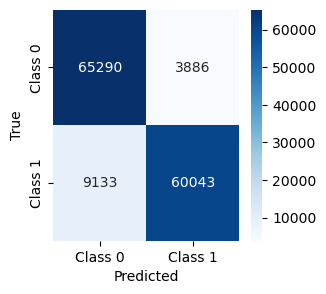

In [103]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_resampled, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [104]:
y_test_pred = navie_byes.predict(x_test_pca)

In [105]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9302849452928442
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     29698
           1       0.69      0.84      0.76      4484

    accuracy                           0.93     34182
   macro avg       0.83      0.89      0.86     34182
weighted avg       0.94      0.93      0.93     34182



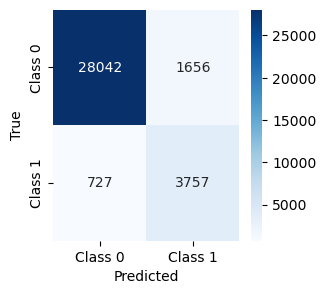

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Resampling and Regualrization on mutual information data

## Navie Bayes using BernoulliNB

In [107]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [108]:
X_train

,LoanCurrentDaysDelinquent,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LoanFirstDefaultedCycleNumber,BorrowerAPR,EstimatedReturn,LoanMonthsSinceOrigination,EstimatedEffectiveYield,EstimatedLoss,LP_CustomerPrincipalPayments,BorrowerRate,LenderYield,CreditGrade,ProsperRating (numeric),ProsperRating (Alpha),MonthlyLoanPayment,ProsperScore,LP_CustomerPayments
103781,-0.327709,-0.293257,-0.289086,0.000000,-0.209417,4.318954e-01,-0.130009,-2.981224e-02,-5.155607e-01,2.922825,-0.171938,-0.171789,8,0.859601,2,1.399784,1.079151,2.931808
56535,-0.327709,-0.293257,-0.289086,0.000000,-1.164181,-1.374703e+00,-0.496993,-1.417629e+00,-1.372935e+00,-0.311376,-1.274612,-1.278942,8,1.296556,0,-0.663351,1.381539,-0.390049
74830,-0.327709,-0.293257,-0.289086,0.000000,-1.292238,-1.267984e+00,0.770771,-1.791662e+00,-1.469575e+00,0.465526,-1.320056,-1.324570,8,1.296556,0,-0.584056,1.381539,0.193900
98341,-0.327709,-0.293257,-0.289086,0.000000,-0.740062,1.879665e-01,-0.430268,-7.237205e-01,-1.372935e+00,-0.477995,-0.753348,-0.755561,8,1.296556,0,-0.815092,1.381539,-0.439522
84660,-0.018907,1.289805,1.315029,-2.380305,1.080361,-1.904172e-14,1.704912,-7.516029e-15,8.046931e-14,-0.709345,1.299631,1.171556,6,-1.325173,7,-0.544149,-1.339948,-0.770214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,-0.327709,-0.293257,-0.289086,0.000000,-1.077192,-1.123152e+00,-0.797252,-1.221304e+00,-1.249037e+00,2.922825,-1.107540,-1.111191,8,1.296556,0,0.278075,0.776764,2.328064
77655,-0.327709,-0.293257,-0.289086,0.000000,-0.745414,-1.904172e-14,2.071896,-7.516029e-15,8.046931e-14,-0.271663,-0.571574,-0.505948,3,-1.325173,7,-1.054224,-1.339948,-0.392472
79683,-0.327709,-0.293257,-0.289086,0.000000,1.395588,2.810203e+00,0.203613,1.847125e+00,6.862495e-01,1.079851,1.366460,1.372856,8,-0.014309,4,0.227633,0.474376,0.850056
56088,-0.327709,-0.293257,-0.289086,0.000000,-0.962700,-1.105619e+00,-1.030788,-1.086584e+00,-1.063190e+00,-0.763123,-0.987248,-0.990411,8,1.296556,0,1.464705,1.986314,-0.873133


In [109]:
##n resampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

### Navie Bayes

In [110]:
from sklearn.naive_bayes import BernoulliNB
navie_byes = BernoulliNB()
navie_byes.fit(X_resampled, y_resampled)

BernoulliNB()

In [111]:
y_train_pred = navie_byes.predict(X_resampled)

In [112]:
temp_df = pd.DataFrame({'Actual': y_resampled, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [113]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_resampled, y_train_pred))
print(metrics.classification_report(y_resampled, y_train_pred))

0.9924829420608303
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     69176
           1       0.99      1.00      0.99     69176

    accuracy                           0.99    138352
   macro avg       0.99      0.99      0.99    138352
weighted avg       0.99      0.99      0.99    138352



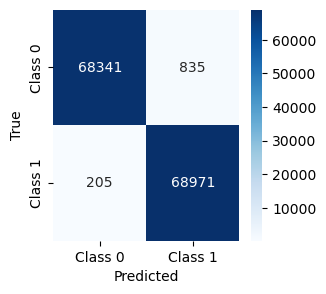

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_resampled, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [115]:
y_test_pred = navie_byes.predict(X_test)

In [116]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,1
99191,0,0


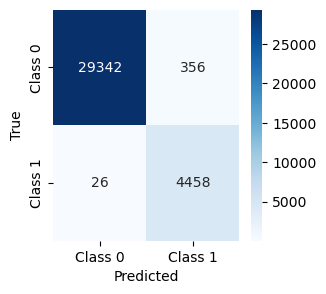

In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [118]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9888245275291089
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29698
           1       0.93      0.99      0.96      4484

    accuracy                           0.99     34182
   macro avg       0.96      0.99      0.98     34182
weighted avg       0.99      0.99      0.99     34182



## Reguarlization on Navie Byes(mutual information)

In [119]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB
grid={ 
    'alpha': [0.1, 0.5, 1.0],'binarize': [0.0, 0.5, 1.0],}
navie=BernoulliNB()
navie_byes=GridSearchCV(navie,grid,cv=5)
navie_byes.fit(X_resampled,y_resampled)

print("tuned hpyerparameters :(best parameters) ",navie_byes.best_params_)
print("accuracy :",navie_byes.best_score_)

tuned hpyerparameters :(best parameters)  {'alpha': 0.1, 'binarize': 0.0}
accuracy : 0.9935093116225726


In [120]:
from sklearn.naive_bayes import BernoulliNB
navie_byes = BernoulliNB(alpha= 0.1,binarize= 0.0)
navie_byes.fit(X_resampled, y_resampled)

BernoulliNB(alpha=0.1)

In [121]:
y_train_pred = navie_byes.predict(X_resampled)

In [122]:
temp_df = pd.DataFrame({'Actual': y_resampled, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [123]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_resampled, y_train_pred))
print(metrics.classification_report(y_resampled, y_train_pred))

0.9935237654677923
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     69176
           1       0.99      1.00      0.99     69176

    accuracy                           0.99    138352
   macro avg       0.99      0.99      0.99    138352
weighted avg       0.99      0.99      0.99    138352



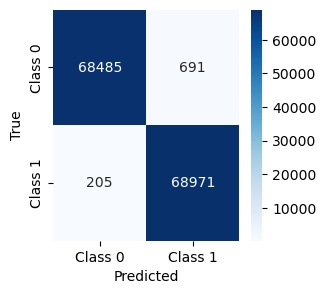

In [124]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_resampled, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [125]:
y_test_pred = navie_byes.predict(X_test)

In [126]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,1
99191,0,0


In [127]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9906090925048271
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29698
           1       0.94      0.99      0.97      4484

    accuracy                           0.99     34182
   macro avg       0.97      0.99      0.98     34182
weighted avg       0.99      0.99      0.99     34182



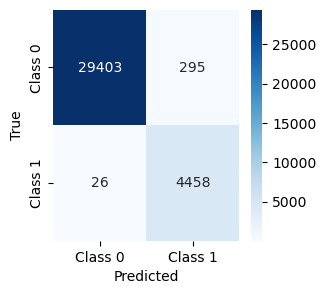

In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_resampled,y_resampled)

LogisticRegression()

In [130]:
y_train_pred = regressor.predict(X_resampled)

In [131]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_resampled, y_train_pred))
print(metrics.classification_report(y_resampled, y_train_pred))

0.9978171620215104
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69176
           1       1.00      1.00      1.00     69176

    accuracy                           1.00    138352
   macro avg       1.00      1.00      1.00    138352
weighted avg       1.00      1.00      1.00    138352



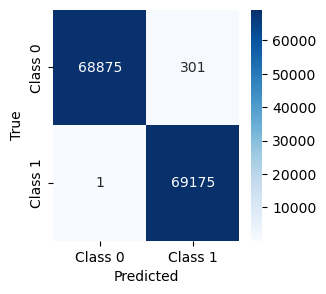

In [132]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_resampled, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [133]:
y_test_pred = regressor.predict(X_test)

In [134]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9964601252120999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29698
           1       0.97      1.00      0.99      4484

    accuracy                           1.00     34182
   macro avg       0.99      1.00      0.99     34182
weighted avg       1.00      1.00      1.00     34182



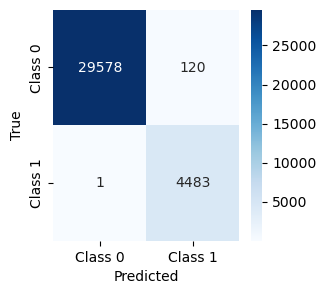

In [135]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Regualarization on Logistic Regression(mutual information)

In [136]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_resampled,y_resampled)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000, 'penalty': 'l2'}
accuracy : 0.9996819725585324


In [137]:
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression(C=1000,penalty='l2')
log_regressor.fit(X_resampled,y_resampled)

LogisticRegression(C=1000)

In [138]:
y_train_pred = log_regressor.predict(X_resampled)

In [139]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_resampled, y_train_pred))
print(metrics.classification_report(y_resampled, y_train_pred))

0.9998698970741298
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69176
           1       1.00      1.00      1.00     69176

    accuracy                           1.00    138352
   macro avg       1.00      1.00      1.00    138352
weighted avg       1.00      1.00      1.00    138352



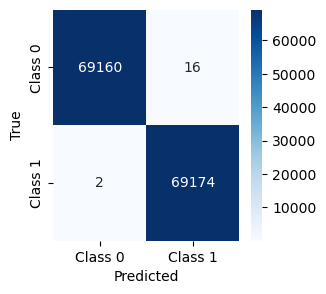

In [140]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_resampled, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [141]:
y_test_pred = log_regressor.predict(X_test)

In [142]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.999765958691709
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29698
           1       1.00      1.00      1.00      4484

    accuracy                           1.00     34182
   macro avg       1.00      1.00      1.00     34182
weighted avg       1.00      1.00      1.00     34182



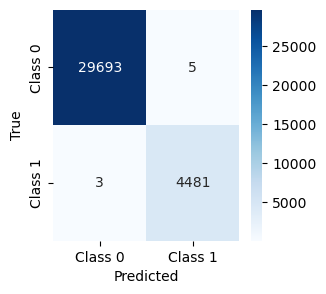

In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## preparing production based code

In [144]:
product_code = loan_data[['LoanCurrentDaysDelinquent','LP_GrossPrincipalLoss','LP_NetPrincipalLoss','LoanFirstDefaultedCycleNumber','BorrowerAPR','EstimatedReturn','LoanMonthsSinceOrigination',
     'EstimatedEffectiveYield','EstimatedLoss','LP_CustomerPrincipalPayments','BorrowerRate','LenderYield','CreditGrade','ProsperRating (numeric)','ProsperRating (Alpha)',
     'MonthlyLoanPayment','ProsperScore','LP_CustomerPayments']]

In [145]:
product_code.head()

,LoanCurrentDaysDelinquent,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LoanFirstDefaultedCycleNumber,BorrowerAPR,EstimatedReturn,LoanMonthsSinceOrigination,EstimatedEffectiveYield,EstimatedLoss,LP_CustomerPrincipalPayments,BorrowerRate,LenderYield,CreditGrade,ProsperRating (numeric),ProsperRating (Alpha),MonthlyLoanPayment,ProsperScore,LP_CustomerPayments
0,0,0.0,0.0,16.268464,0.16516,0.096068,78,0.168661,0.080306,9425.00,0.1580,0.1380,C,0.0,not available,330.43,0.0,11396.14
1,0,0.0,0.0,16.268464,0.12016,0.054700,0,0.079600,0.024900,0.00,0.0920,0.0820,not available,6.0,A,318.93,7.0,0.00
2,0,0.0,0.0,16.268464,0.28269,0.096068,86,0.168661,0.080306,3001.00,0.2750,0.2400,HR,0.0,not available,123.32,0.0,4186.63
3,0,0.0,0.0,16.268464,0.12528,0.060000,16,0.084900,0.024900,4091.09,0.0974,0.0874,not available,6.0,A,321.45,9.0,5143.20
4,0,0.0,0.0,16.268464,0.24614,0.090660,6,0.183160,0.092500,1563.22,0.2085,0.1985,not available,3.0,D,563.97,4.0,2819.85


## Data Encoding

In [146]:
categorical_data = product_code.select_dtypes(include=['object'])
categorical_data.head()

,CreditGrade,ProsperRating (Alpha)
0,C,not available
1,not available,A
2,HR,not available
3,not available,A
4,not available,D


In [147]:
le = LabelEncoder()
categorical_data = categorical_data.apply(LabelEncoder().fit_transform)

In [148]:
categorical_data.head()

,CreditGrade,ProsperRating (Alpha)
0,3,7
1,8,0
2,6,7
3,8,0
4,8,4


In [149]:
dump(le, open('C:/Users/ammanana/Desktop/technocolabs/labelencoding_model.pkl', 'wb'))

In [150]:
numerical_data = product_code.select_dtypes(include=['int','float'])
numerical_data.head()

,LoanCurrentDaysDelinquent,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LoanFirstDefaultedCycleNumber,BorrowerAPR,EstimatedReturn,LoanMonthsSinceOrigination,EstimatedEffectiveYield,EstimatedLoss,LP_CustomerPrincipalPayments,BorrowerRate,LenderYield,ProsperRating (numeric),MonthlyLoanPayment,ProsperScore,LP_CustomerPayments
0,0,0.0,0.0,16.268464,0.16516,0.096068,78,0.168661,0.080306,9425.00,0.1580,0.1380,0.0,330.43,0.0,11396.14
1,0,0.0,0.0,16.268464,0.12016,0.054700,0,0.079600,0.024900,0.00,0.0920,0.0820,6.0,318.93,7.0,0.00
2,0,0.0,0.0,16.268464,0.28269,0.096068,86,0.168661,0.080306,3001.00,0.2750,0.2400,0.0,123.32,0.0,4186.63
3,0,0.0,0.0,16.268464,0.12528,0.060000,16,0.084900,0.024900,4091.09,0.0974,0.0874,6.0,321.45,9.0,5143.20
4,0,0.0,0.0,16.268464,0.24614,0.090660,6,0.183160,0.092500,1563.22,0.2085,0.1985,3.0,563.97,4.0,2819.85


In [151]:
from sklearn.preprocessing import StandardScaler

scaler_data = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

numerical_data_rescaled = pd.DataFrame(scaler.fit_transform(numerical_data), 
                                    columns = numerical_data.columns, 
                                    index = numerical_data.index)

numerical_data_rescaled.head()

,LoanCurrentDaysDelinquent,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LoanFirstDefaultedCycleNumber,BorrowerAPR,EstimatedReturn,LoanMonthsSinceOrigination,EstimatedEffectiveYield,EstimatedLoss,LP_CustomerPrincipalPayments,BorrowerRate,LenderYield,ProsperRating (numeric),MonthlyLoanPayment,ProsperScore,LP_CustomerPayments
0,-0.327709,-0.293257,-0.289086,0.0,-0.667883,-1.904172e-14,1.538101,-7.516029e-15,8.046931e-14,1.552881,-0.464648,-0.599888,-1.325173,0.300753,-1.339948,1.505580
1,-0.327709,-0.293257,-0.289086,0.0,-1.227898,-1.576707e+00,-1.064150,-1.507329e+00,-1.372935e+00,-0.763123,-1.346787,-1.351410,1.296556,0.241074,0.776764,-0.873133
2,-0.327709,-0.293257,-0.289086,0.0,0.794753,-1.904172e-14,1.804998,-7.516029e-15,8.046931e-14,-0.025688,1.099145,0.768955,-1.325173,-0.774043,-1.339948,0.000741
3,-0.327709,-0.293257,-0.289086,0.0,-1.164181,-1.374703e+00,-0.530355,-1.417629e+00,-1.372935e+00,0.242180,-1.274612,-1.278942,1.296556,0.254151,1.381539,0.200406
4,-0.327709,-0.293257,-0.289086,0.0,0.339896,-2.061312e-01,-0.863977,2.453816e-01,3.021659e-01,-0.378993,0.210323,0.212024,-0.014309,1.512708,-0.130398,-0.284546


In [152]:
scaled_data = pd.concat([categorical_data,numerical_data_rescaled],axis=1)
scaled_data.head()

,CreditGrade,ProsperRating (Alpha),LoanCurrentDaysDelinquent,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LoanFirstDefaultedCycleNumber,BorrowerAPR,EstimatedReturn,LoanMonthsSinceOrigination,EstimatedEffectiveYield,EstimatedLoss,LP_CustomerPrincipalPayments,BorrowerRate,LenderYield,ProsperRating (numeric),MonthlyLoanPayment,ProsperScore,LP_CustomerPayments
0,3,7,-0.327709,-0.293257,-0.289086,0.0,-0.667883,-1.904172e-14,1.538101,-7.516029e-15,8.046931e-14,1.552881,-0.464648,-0.599888,-1.325173,0.300753,-1.339948,1.505580
1,8,0,-0.327709,-0.293257,-0.289086,0.0,-1.227898,-1.576707e+00,-1.064150,-1.507329e+00,-1.372935e+00,-0.763123,-1.346787,-1.351410,1.296556,0.241074,0.776764,-0.873133
2,6,7,-0.327709,-0.293257,-0.289086,0.0,0.794753,-1.904172e-14,1.804998,-7.516029e-15,8.046931e-14,-0.025688,1.099145,0.768955,-1.325173,-0.774043,-1.339948,0.000741
3,8,0,-0.327709,-0.293257,-0.289086,0.0,-1.164181,-1.374703e+00,-0.530355,-1.417629e+00,-1.372935e+00,0.242180,-1.274612,-1.278942,1.296556,0.254151,1.381539,0.200406
4,8,4,-0.327709,-0.293257,-0.289086,0.0,0.339896,-2.061312e-01,-0.863977,2.453816e-01,3.021659e-01,-0.378993,0.210323,0.212024,-0.014309,1.512708,-0.130398,-0.284546


In [153]:
# Rename columns
new_column_names = {'ProsperRating (Alpha)': 'prosperRating_alpha', 'ProsperRating (numeric)': 'prosperrating_num'}
scaled_data.rename(columns=new_column_names, inplace=True)

In [154]:
scaled_data.head()

,CreditGrade,prosperRating_alpha,LoanCurrentDaysDelinquent,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LoanFirstDefaultedCycleNumber,BorrowerAPR,EstimatedReturn,LoanMonthsSinceOrigination,EstimatedEffectiveYield,EstimatedLoss,LP_CustomerPrincipalPayments,BorrowerRate,LenderYield,prosperrating_num,MonthlyLoanPayment,ProsperScore,LP_CustomerPayments
0,3,7,-0.327709,-0.293257,-0.289086,0.0,-0.667883,-1.904172e-14,1.538101,-7.516029e-15,8.046931e-14,1.552881,-0.464648,-0.599888,-1.325173,0.300753,-1.339948,1.505580
1,8,0,-0.327709,-0.293257,-0.289086,0.0,-1.227898,-1.576707e+00,-1.064150,-1.507329e+00,-1.372935e+00,-0.763123,-1.346787,-1.351410,1.296556,0.241074,0.776764,-0.873133
2,6,7,-0.327709,-0.293257,-0.289086,0.0,0.794753,-1.904172e-14,1.804998,-7.516029e-15,8.046931e-14,-0.025688,1.099145,0.768955,-1.325173,-0.774043,-1.339948,0.000741
3,8,0,-0.327709,-0.293257,-0.289086,0.0,-1.164181,-1.374703e+00,-0.530355,-1.417629e+00,-1.372935e+00,0.242180,-1.274612,-1.278942,1.296556,0.254151,1.381539,0.200406
4,8,4,-0.327709,-0.293257,-0.289086,0.0,0.339896,-2.061312e-01,-0.863977,2.453816e-01,3.021659e-01,-0.378993,0.210323,0.212024,-0.014309,1.512708,-0.130398,-0.284546


In [155]:
y = loan_data['Status']
x = scaled_data

In [156]:
x

,CreditGrade,prosperRating_alpha,LoanCurrentDaysDelinquent,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LoanFirstDefaultedCycleNumber,BorrowerAPR,EstimatedReturn,LoanMonthsSinceOrigination,EstimatedEffectiveYield,EstimatedLoss,LP_CustomerPrincipalPayments,BorrowerRate,LenderYield,prosperrating_num,MonthlyLoanPayment,ProsperScore,LP_CustomerPayments
0,3,7,-0.327709,-0.293257,-0.289086,0.0,-0.667883,-1.904172e-14,1.538101,-7.516029e-15,8.046931e-14,1.552881,-0.464648,-0.599888,-1.325173,0.300753,-1.339948,1.505580
1,8,0,-0.327709,-0.293257,-0.289086,0.0,-1.227898,-1.576707e+00,-1.064150,-1.507329e+00,-1.372935e+00,-0.763123,-1.346787,-1.351410,1.296556,0.241074,0.776764,-0.873133
2,6,7,-0.327709,-0.293257,-0.289086,0.0,0.794753,-1.904172e-14,1.804998,-7.516029e-15,8.046931e-14,-0.025688,1.099145,0.768955,-1.325173,-0.774043,-1.339948,0.000741
3,8,0,-0.327709,-0.293257,-0.289086,0.0,-1.164181,-1.374703e+00,-0.530355,-1.417629e+00,-1.372935e+00,0.242180,-1.274612,-1.278942,1.296556,0.254151,1.381539,0.200406
4,8,4,-0.327709,-0.293257,-0.289086,0.0,0.339896,-2.061312e-01,-0.863977,2.453816e-01,3.021659e-01,-0.378993,0.210323,0.212024,-0.014309,1.512708,-0.130398,-0.284546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,8,3,-0.327709,-0.293257,-0.289086,0.0,0.058644,-4.071693e-02,-0.697166,-6.366143e-02,-2.578529e-01,-0.213086,-0.085060,-0.084559,0.422646,0.478805,0.171989,-0.111812
113933,8,0,-0.327709,-0.293257,-0.289086,0.0,-1.078063,-5.857457e-01,-0.130009,-1.150220e+00,-1.494355e+00,-0.272361,-1.092838,-1.096429,1.296556,-1.073737,1.079151,-0.386678
113934,8,4,-0.327709,-0.293257,-0.289086,0.0,0.261494,-3.921271e-01,-0.964063,3.320355e-01,5.499618e-01,-0.718118,0.297200,0.299254,-0.014309,0.004537,-0.432786,-0.759020
113935,8,3,-0.327709,-0.293257,-0.289086,0.0,0.812052,2.417630e+00,-0.130009,1.283536e+00,1.163189e-01,2.922825,0.905342,0.909865,0.422646,0.918926,0.171989,3.535772


In [157]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [158]:
X_train

,CreditGrade,prosperRating_alpha,LoanCurrentDaysDelinquent,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LoanFirstDefaultedCycleNumber,BorrowerAPR,EstimatedReturn,LoanMonthsSinceOrigination,EstimatedEffectiveYield,EstimatedLoss,LP_CustomerPrincipalPayments,BorrowerRate,LenderYield,prosperrating_num,MonthlyLoanPayment,ProsperScore,LP_CustomerPayments
103781,8,2,-0.327709,-0.293257,-0.289086,0.000000,-0.209417,4.318954e-01,-0.130009,-2.981224e-02,-5.155607e-01,2.922825,-0.171938,-0.171789,0.859601,1.399784,1.079151,2.931808
56535,8,0,-0.327709,-0.293257,-0.289086,0.000000,-1.164181,-1.374703e+00,-0.496993,-1.417629e+00,-1.372935e+00,-0.311376,-1.274612,-1.278942,1.296556,-0.663351,1.381539,-0.390049
74830,8,0,-0.327709,-0.293257,-0.289086,0.000000,-1.292238,-1.267984e+00,0.770771,-1.791662e+00,-1.469575e+00,0.465526,-1.320056,-1.324570,1.296556,-0.584056,1.381539,0.193900
98341,8,0,-0.327709,-0.293257,-0.289086,0.000000,-0.740062,1.879665e-01,-0.430268,-7.237205e-01,-1.372935e+00,-0.477995,-0.753348,-0.755561,1.296556,-0.815092,1.381539,-0.439522
84660,6,7,-0.018907,1.289805,1.315029,-2.380305,1.080361,-1.904172e-14,1.704912,-7.516029e-15,8.046931e-14,-0.709345,1.299631,1.171556,-1.325173,-0.544149,-1.339948,-0.770214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,8,0,-0.327709,-0.293257,-0.289086,0.000000,-1.077192,-1.123152e+00,-0.797252,-1.221304e+00,-1.249037e+00,2.922825,-1.107540,-1.111191,1.296556,0.278075,0.776764,2.328064
77655,3,7,-0.327709,-0.293257,-0.289086,0.000000,-0.745414,-1.904172e-14,2.071896,-7.516029e-15,8.046931e-14,-0.271663,-0.571574,-0.505948,-1.325173,-1.054224,-1.339948,-0.392472
79683,8,4,-0.327709,-0.293257,-0.289086,0.000000,1.395588,2.810203e+00,0.203613,1.847125e+00,6.862495e-01,1.079851,1.366460,1.372856,-0.014309,0.227633,0.474376,0.850056
56088,8,0,-0.327709,-0.293257,-0.289086,0.000000,-0.962700,-1.105619e+00,-1.030788,-1.086584e+00,-1.063190e+00,-0.763123,-0.987248,-0.990411,1.296556,1.464705,1.986314,-0.873133


In [159]:
##n resampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [160]:
X_resampled

,CreditGrade,prosperRating_alpha,LoanCurrentDaysDelinquent,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LoanFirstDefaultedCycleNumber,BorrowerAPR,EstimatedReturn,LoanMonthsSinceOrigination,EstimatedEffectiveYield,EstimatedLoss,LP_CustomerPrincipalPayments,BorrowerRate,LenderYield,prosperrating_num,MonthlyLoanPayment,ProsperScore,LP_CustomerPayments
0,8,2,-0.327709,-0.293257,-0.289086,0.000000,-0.209417,4.318954e-01,-0.130009,-2.981224e-02,-5.155607e-01,2.922825,-0.171938,-0.171789,0.859601,1.399784,1.079151,2.931808
1,8,0,-0.327709,-0.293257,-0.289086,0.000000,-1.164181,-1.374703e+00,-0.496993,-1.417629e+00,-1.372935e+00,-0.311376,-1.274612,-1.278942,1.296556,-0.663351,1.381539,-0.390049
2,8,0,-0.327709,-0.293257,-0.289086,0.000000,-1.292238,-1.267984e+00,0.770771,-1.791662e+00,-1.469575e+00,0.465526,-1.320056,-1.324570,1.296556,-0.584056,1.381539,0.193900
3,8,0,-0.327709,-0.293257,-0.289086,0.000000,-0.740062,1.879665e-01,-0.430268,-7.237205e-01,-1.372935e+00,-0.477995,-0.753348,-0.755561,1.296556,-0.815092,1.381539,-0.439522
4,6,7,-0.018907,1.289805,1.315029,-2.380305,1.080361,-1.904172e-14,1.704912,-7.516029e-15,8.046931e-14,-0.709345,1.299631,1.171556,-1.325173,-0.544149,-1.339948,-0.770214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138347,5,7,3.061423,0.971508,0.935031,2.366452,0.510147,-1.904172e-14,1.695638,-7.516029e-15,8.046931e-14,-0.259625,0.692986,0.562447,-1.325173,-0.378541,-1.339948,-0.107302
138348,4,7,4.393793,1.651276,1.669566,-2.223727,-0.267328,-1.904172e-14,1.518206,-7.516029e-15,8.046931e-14,-0.670820,-0.047703,-0.150646,-1.325173,-0.465323,-1.339948,-0.738759
138349,2,7,3.370637,4.081838,4.144192,0.998621,-0.293139,-1.904172e-14,1.394206,-7.516029e-15,8.046931e-14,0.536160,-0.089597,-0.089114,-1.325173,1.564249,-1.339948,0.905406
138350,3,7,0.901994,2.309152,2.342551,-1.337650,0.249865,-1.904172e-14,1.753549,-7.516029e-15,8.046931e-14,-0.467686,0.516639,0.532270,-1.325173,0.076305,-1.339948,-0.425994


In [161]:
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression(C=1000,penalty='l2')
log_regressor.fit(X_resampled,y_resampled)

LogisticRegression(C=1000)

In [162]:
y_train_pred = log_regressor.predict(X_resampled)

In [163]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_resampled, y_train_pred))
print(metrics.classification_report(y_resampled, y_train_pred))

0.9998698970741298
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69176
           1       1.00      1.00      1.00     69176

    accuracy                           1.00    138352
   macro avg       1.00      1.00      1.00    138352
weighted avg       1.00      1.00      1.00    138352



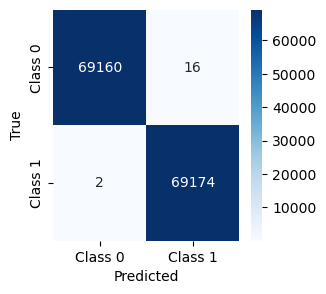

In [164]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_resampled, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [165]:
y_test_pred = log_regressor.predict(X_test)

In [166]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.999765958691709
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29698
           1       1.00      1.00      1.00      4484

    accuracy                           1.00     34182
   macro avg       1.00      1.00      1.00     34182
weighted avg       1.00      1.00      1.00     34182



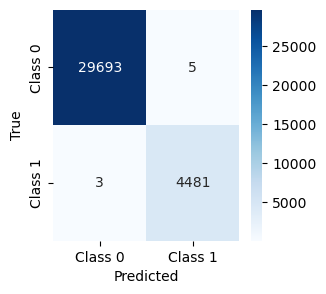

In [167]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [168]:
dump(log_regressor, open('C:/Users/ammanana/Desktop/technocolabs/logstic_model.pkl', 'wb'))
dump(scaler_data, open('C:/Users/ammanana/Desktop/technocolabs/scaler_data.pkl', 'wb'))

In [169]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CreditGrade                    113937 non-null  int32  
 1   prosperRating_alpha            113937 non-null  int32  
 2   LoanCurrentDaysDelinquent      113937 non-null  float64
 3   LP_GrossPrincipalLoss          113937 non-null  float64
 4   LP_NetPrincipalLoss            113937 non-null  float64
 5   LoanFirstDefaultedCycleNumber  113937 non-null  float64
 6   BorrowerAPR                    113937 non-null  float64
 7   EstimatedReturn                113937 non-null  float64
 8   LoanMonthsSinceOrigination     113937 non-null  float64
 9   EstimatedEffectiveYield        113937 non-null  float64
 10  EstimatedLoss                  113937 non-null  float64
 11  LP_CustomerPrincipalPayments   113937 non-null  float64
 12  BorrowerRate                  

In [170]:
scaled_data.to_csv("product_code.csv")

In [171]:
scaled_data.head()

,CreditGrade,prosperRating_alpha,LoanCurrentDaysDelinquent,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LoanFirstDefaultedCycleNumber,BorrowerAPR,EstimatedReturn,LoanMonthsSinceOrigination,EstimatedEffectiveYield,EstimatedLoss,LP_CustomerPrincipalPayments,BorrowerRate,LenderYield,prosperrating_num,MonthlyLoanPayment,ProsperScore,LP_CustomerPayments
0,3,7,-0.327709,-0.293257,-0.289086,0.0,-0.667883,-1.904172e-14,1.538101,-7.516029e-15,8.046931e-14,1.552881,-0.464648,-0.599888,-1.325173,0.300753,-1.339948,1.505580
1,8,0,-0.327709,-0.293257,-0.289086,0.0,-1.227898,-1.576707e+00,-1.064150,-1.507329e+00,-1.372935e+00,-0.763123,-1.346787,-1.351410,1.296556,0.241074,0.776764,-0.873133
2,6,7,-0.327709,-0.293257,-0.289086,0.0,0.794753,-1.904172e-14,1.804998,-7.516029e-15,8.046931e-14,-0.025688,1.099145,0.768955,-1.325173,-0.774043,-1.339948,0.000741
3,8,0,-0.327709,-0.293257,-0.289086,0.0,-1.164181,-1.374703e+00,-0.530355,-1.417629e+00,-1.372935e+00,0.242180,-1.274612,-1.278942,1.296556,0.254151,1.381539,0.200406
4,8,4,-0.327709,-0.293257,-0.289086,0.0,0.339896,-2.061312e-01,-0.863977,2.453816e-01,3.021659e-01,-0.378993,0.210323,0.212024,-0.014309,1.512708,-0.130398,-0.284546
